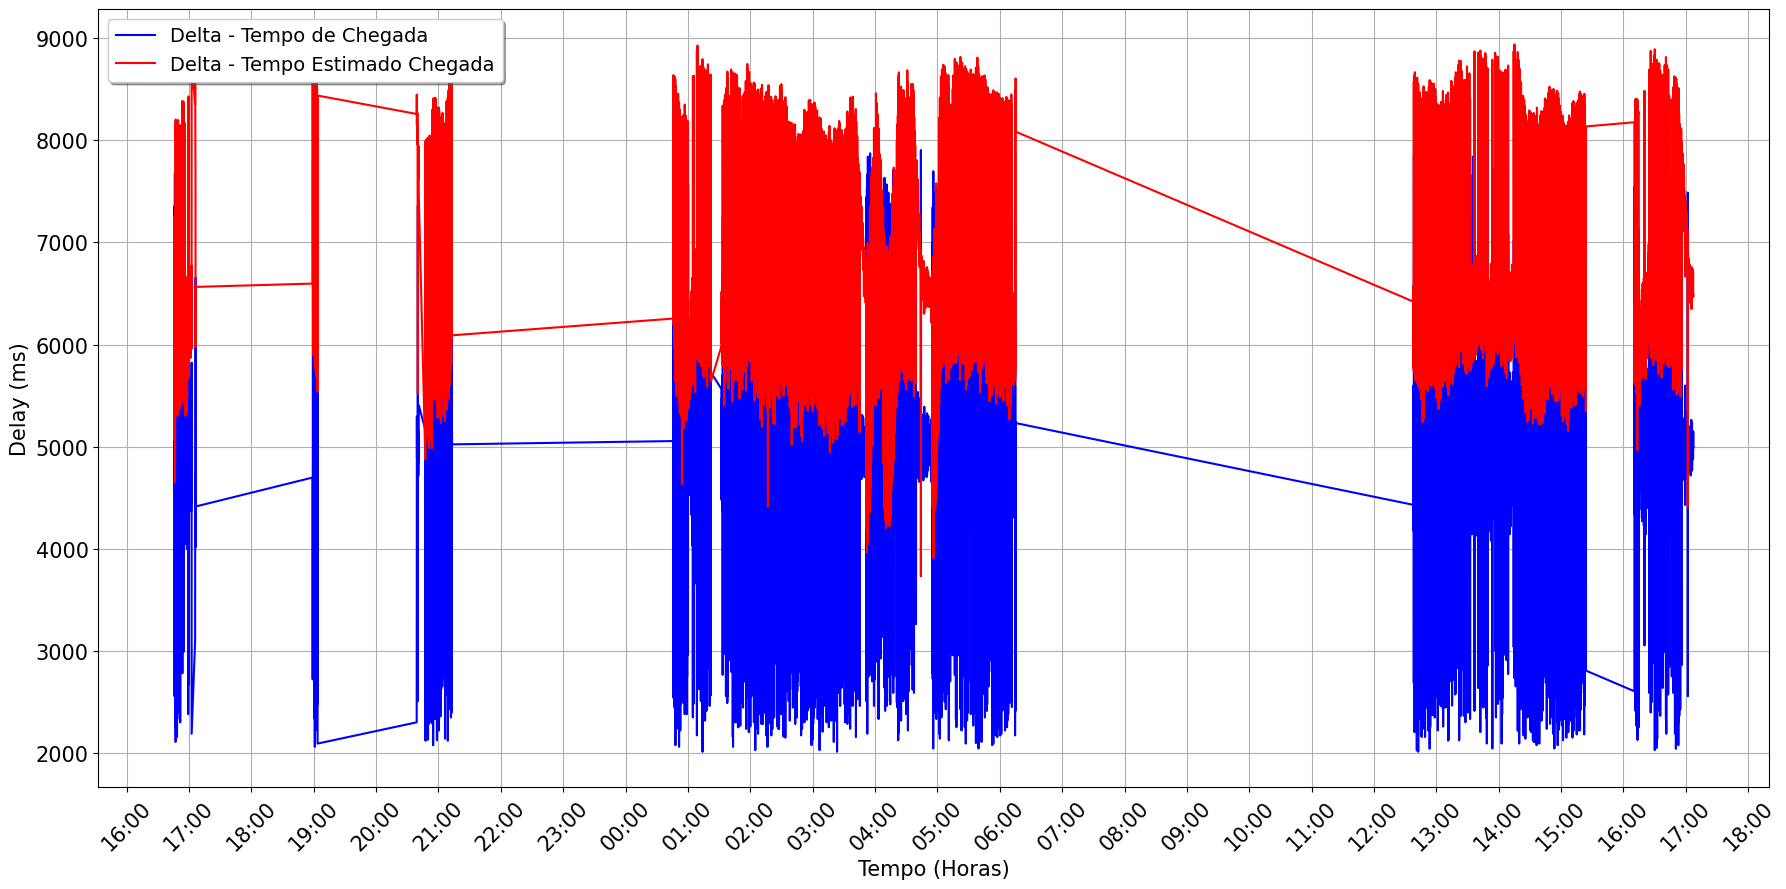

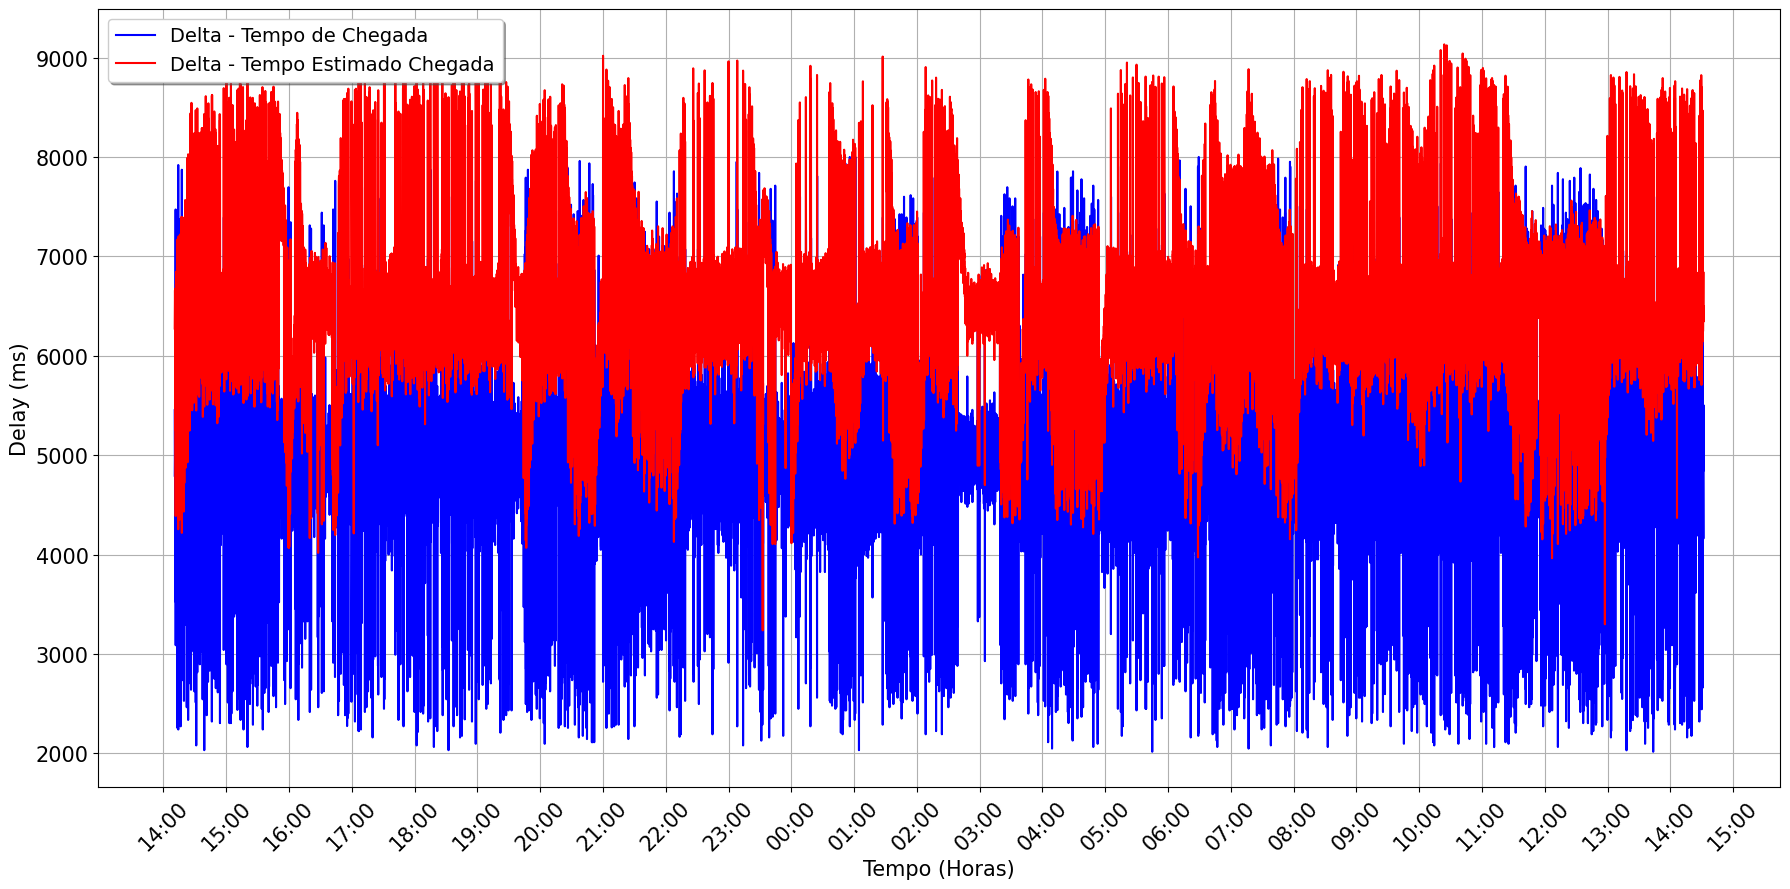

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

def processar_e_gerar_grafico(file_path, device_id, min_delta_arrival, max_delta_arrival):
    # Carregamento dos dados
    data = pd.read_excel(file_path)

    # Filtro dos dados para um dispositivo específico e dentro dos limites de 'Delta-arrival'
    device_data = data[(data['dev'] == device_id) & 
                       (data['Delta-arrival'] >= min_delta_arrival) & 
                       (data['Delta-arrival'] <= max_delta_arrival) & 
                       (data['Ea-grafico'] >= 0)].copy()

    # Conversão da coluna 'arrival' de nanosegundos para horas
    device_data['hours'] = device_data['arrival'] / (1e9 * 60 * 60)

    # Preparação do gráfico
    plt.figure(figsize=(18, 9))

    # Plotagem de 'Delta-arrival' e 'Ea-grafico'
    plt.plot(device_data['hours'], device_data['Delta-arrival'], color='blue', label='Delta - Tempo de Chegada')
    plt.plot(device_data['hours'], device_data['Ea-grafico'], color='red', label='Delta - Tempo Estimado Chegada')

    # Configuração de rótulos e título dinâmico
    plt.xlabel('Tempo (Horas)', fontsize=15)
    plt.ylabel('Delay (ms)', fontsize=15)
    plt.title('', fontsize=15)
    
    # Cálculo dos ticks do eixo X com base nas horas de início e fim
    start_hour = np.floor(device_data['hours'].min())
    end_hour = np.ceil(device_data['hours'].max())
    hour_ticks = np.arange(start_hour, end_hour + 1, 1)
    hour_labels = [f"{int(hour)%24:02d}:00" for hour in hour_ticks]

    # Definição dos ticks do eixo x para mostrar as horas corretamente
    plt.xticks(ticks=hour_ticks, labels=hour_labels, fontsize=15, rotation=45)
    plt.yticks(fontsize=15)

    # Exibição da grade
    plt.grid(True)

    # Adicionando a legenda de forma a não sobrepor o gráfico
    #plt.legend(loc='upper right', fontsize=13, shadow=True)
    
    # Adicionando a legenda abaixo do eixo X com fonte tamanho 12
    #plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), fontsize=12, shadow=True, ncol=2)
    plt.legend(loc='upper left', fontsize=14, shadow=True)

    # Ajuste do layout para garantir que o gráfico caiba na área visível da célula do notebook
    plt.tight_layout()

    # Salvar o gráfico em um arquivo no mesmo diretório do arquivo Excel
    excel_dir = os.path.dirname(file_path)
    caminho_grafico_pdf = os.path.join(excel_dir, f"grafico_dispositivo_{device_id}.pdf")
    plt.savefig(caminho_grafico_pdf, dpi=600)

    # Exibir o gráfico e fechar
    plt.show()
    plt.close()


# Definição dos limites de 'Delta-arrival'
min_delta_arrival = 2000  # Exemplo de tempo mínimo
max_delta_arrival = 8000  # Exemplo de tempo máximo

# Lista de IDs de dispositivos desejados
device_ids = [5]  # Substitua pelos IDs dos dispositivos desejados

# Lista de endereços de arquivos
caminhos = [
    "C:/Users/Abadio/Desktop/Gráficos/Logs/Graficos_Artigos/grenoble/5 segundos - 7_Experimento_389054/tempoProximoHeartbeat.xlsx",
    "C:/Users/Abadio/Desktop/Gráficos/Logs/Graficos_Artigos/strasbourg/5 segundos - 7_Experimento_389053/tempoProximoHeartbeat.xlsx"
]

# Processar cada arquivo na lista
for caminho in caminhos:
    for device_id in device_ids:
        processar_e_gerar_grafico(caminho, device_id, min_delta_arrival, max_delta_arrival)
